In [453]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder

from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, fbeta_score, make_scorer, f1_score, recall_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import plotly.express as px
import plotly.graph_objects as go

sns_palette = sns.color_palette("Set1")

In [454]:
lrn = pd.read_csv('breast-cancer-diagnostic.shuf.lrn.csv')

In [455]:
y = lrn['class']
X = lrn.drop(['ID', 'class'], axis=1)

In [456]:
X.head()

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.024560,0.1496,0.05674,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.17860,0.09678,0.2506,0.07623
1,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,0.1555,0.06048,...,13.64,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083
2,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.037830,0.1714,0.06843,...,15.11,25.63,99.43,701.9,0.1425,0.2566,0.19350,0.12840,0.2849,0.09031
3,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.074150,0.2678,0.07371,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300
4,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.062540,0.1720,0.05780,...,20.38,22.02,133.30,1292.0,0.1263,0.2666,0.42900,0.15350,0.2842,0.08225


### Hold-out

In [457]:
def hold_out(model_label, model, X, y, scale=None, n=10):

    # if a scaling method is given, perform scaling
    if scale is not None:
        model = make_pipeline(scale, model)

    # dataframe for results for each split
    results = pd.DataFrame(columns=['Split/Fold', 'Method', 'Algorithm', 'Scaling', 'Accuracy', 'Recall', 'F1-score', 'F2-score', 'Training time'])
    #results = []

    # perform the hold out method n times with n different seeds
    for i in range(n):

        # split the data into training and testing set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)

        # train the model on the train set
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        tr_time = end - start

        # predict values for the test set
        y_predicted = model.predict(X_test)
        
        # calculate metrics
        acc = accuracy_score(y_test, y_predicted)
        r = recall_score(y_test, y_predicted)
        f1 = f1_score(y_test, y_predicted)
        f2 = fbeta_score(y_test, y_predicted, beta=2)

        result =  {'Split/Fold': i,
                   'Method': 'Hold out',
                    'Algorithm': model_label, 
                    'Scaling': 'None' if scale is None else type(scale).__name__,
                    'Accuracy': acc,
                    'Recall': r,
                    'F1-score': f1,
                    'F2-score': f2,
                    'Training time': tr_time}
        
        results.loc[len(results)] = result

    return results

In [458]:
res_ho = pd.DataFrame(columns=['Split/Fold', 'Method', 'Algorithm', 'Scaling', 'Accuracy', 'Recall', 'F1-score', 'F2-score', 'Training time'])

res_ho =  pd.concat([res_ho, hold_out("SVM", SVC(), X, y)])
res_ho =  pd.concat([res_ho, hold_out("SVM", SVC(), X, y, scale=StandardScaler())])
res_ho =  pd.concat([res_ho, hold_out("SVM", SVC(), X, y, scale=MinMaxScaler())])

res_ho = pd.concat([res_ho, hold_out("Logistic Regression", LogisticRegression(), X, y)])
res_ho = pd.concat([res_ho, hold_out("Logistic Regression", LogisticRegression(), X, y, scale=StandardScaler())])
res_ho = pd.concat([res_ho, hold_out("Logistic Regression", LogisticRegression(), X, y, scale=MinMaxScaler())])

res_ho = pd.concat([res_ho, hold_out("Decision Tree", DecisionTreeClassifier(), X, y)])
res_ho = pd.concat([res_ho, hold_out("Decision Tree", DecisionTreeClassifier(), X, y, scale=StandardScaler())])
res_ho = pd.concat([res_ho, hold_out("Decision Tree", DecisionTreeClassifier(), X, y, scale=MinMaxScaler())])

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\38599\anaconda3\lib\site-packages

In [459]:
res_ho

,Split/Fold,Method,Algorithm,Scaling,Accuracy,Recall,F1-score,F2-score,Training time
0,0,Hold out,SVM,None,0.888889,0.783784,0.878788,0.819209,0.002000
1,1,Hold out,SVM,None,0.888889,0.724138,0.840000,0.766423,0.001998
2,2,Hold out,SVM,None,0.902778,0.785714,0.862745,0.814815,0.003003
3,3,Hold out,SVM,None,0.888889,0.708333,0.809524,0.745614,0.001000
4,4,Hold out,SVM,None,0.888889,0.730769,0.826087,0.766129,0.001997
...,...,...,...,...,...,...,...,...,...
5,5,Hold out,Decision Tree,MinMaxScaler,0.944444,0.925926,0.925926,0.925926,0.003983
6,6,Hold out,Decision Tree,MinMaxScaler,0.944444,0.892857,0.925926,0.905797,0.002999
7,7,Hold out,Decision Tree,MinMaxScaler,0.930556,0.962963,0.912281,0.942029,0.002997
8,8,Hold out,Decision Tree,MinMaxScaler,0.930556,0.878788,0.920635,0.895062,0.003998


In [460]:
res_ho.groupby(['Algorithm', 'Scaling']).agg({'Accuracy': [ 'min', 'mean', 'max', 'std']})

Accuracy                              
                                         min      mean       max       std
Algorithm           Scaling                                               
Decision Tree       MinMaxScaler    0.888889  0.918056  0.944444  0.021165
                    None            0.888889  0.919444  0.944444  0.015768
                    StandardScaler  0.888889  0.920833  0.944444  0.017384
Logistic Regression MinMaxScaler    0.902778  0.956944  1.000000  0.026555
                    None            0.888889  0.923611  0.972222  0.028726
                    StandardScaler  0.930556  0.968056  1.000000  0.022728
SVM                 MinMaxScaler    0.930556  0.970833  1.000000  0.022155
                    None            0.875000  0.893056  0.916667  0.014713
                    StandardScaler  0.902778  0.965278  0.986111  0.025568

In [461]:
res_ho.groupby(['Algorithm', 'Scaling']).agg({'F2-score': [ 'min', 'mean', 'max', 'std']})

F2-score                              
                                         min      mean       max       std
Algorithm           Scaling                                               
Decision Tree       MinMaxScaler    0.818966  0.892629  0.942029  0.035203
                    None            0.818966  0.900397  0.955882  0.038173
                    StandardScaler  0.818966  0.898607  0.932836  0.033562
Logistic Regression MinMaxScaler    0.821429  0.921765  1.000000  0.044886
                    None            0.815603  0.884065  0.982143  0.049256
                    StandardScaler  0.895062  0.956946  1.000000  0.036308
SVM                 MinMaxScaler    0.880282  0.952764  1.000000  0.036327
                    None            0.745614  0.787399  0.839695  0.032376
                    StandardScaler  0.845070  0.942376  0.990991  0.043582

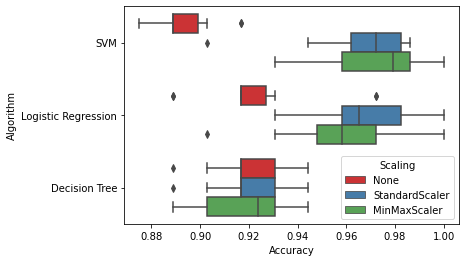

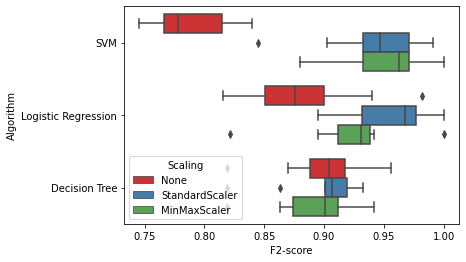

In [462]:
sns.boxplot(y="Algorithm", x="Accuracy",
            hue="Scaling", palette=sns_palette,
            data=res_ho)
plt.show()
sns.boxplot(y="Algorithm", x="F2-score",
            hue="Scaling", palette=sns_palette,
            data=res_ho)
plt.show()

### Cross-validation

In [463]:
def cross_validation(model_label, model, X, y, scale=None):

    # if a scaling method is given, perform scaling
    if scale is not None:
        model = make_pipeline(scale, model)

    # dataframe for results of each fold
    results = pd.DataFrame(columns=['Split/Fold', 'Method', 'Algorithm', 'Scaling', 'Accuracy', 'Recall', 'F1-score', 'F2-score', 'Training time'])

    cval = cross_validate(model, X, y, scoring={'accuracy': 'accuracy', 
                                               'recall': 'recall',
                                               'f1': 'f1', 
                                               'f2': make_scorer(fbeta_score, beta=2)}, 
                         n_jobs=-1)
    
    for i in range(len(cval['test_accuracy'])):
        # fetch calculated metrics
        acc = cval['test_accuracy'][i]
        r = cval['test_recall'][i]
        f1 = cval['test_f1'][i]
        f2 = cval['test_f2'][i]
        tr_time = cval['fit_time'][i]

        result =   {'Split/Fold': i+1,
                    'Method':'Cross-validation',
                    'Algorithm': model_label, 
                    'Scaling': 'None' if scale is None else type(scale).__name__,
                    'Accuracy': acc,
                    'Recall': r,
                    'F1-score': f1,
                    'F2-score': f2,
                    'Training time': tr_time}
        results.loc[len(results)] = result
    
    return results

In [464]:
res_cv = pd.DataFrame(columns=['Split/Fold', 'Method', 'Algorithm', 'Scaling', 'Accuracy', 'Recall', 'F1-score', 'F2-score', 'Training time'])

In [465]:
res_cv =  pd.concat([res_cv, cross_validation("SVM", SVC(), X, y)])
res_cv =  pd.concat([res_cv, cross_validation("SVM", SVC(), X, y, scale=StandardScaler())])
res_cv =  pd.concat([res_cv, cross_validation("SVM", SVC(), X, y, scale=MinMaxScaler())])

In [466]:
res_cv = pd.concat([res_cv, cross_validation("Logistic Regression", LogisticRegression(), X, y)])
res_cv = pd.concat([res_cv, cross_validation("Logistic Regression", LogisticRegression(), X, y, scale=StandardScaler())])
res_cv = pd.concat([res_cv, cross_validation("Logistic Regression", LogisticRegression(), X, y, scale=MinMaxScaler())])

In [467]:
res_cv = pd.concat([res_cv, cross_validation("Decision Tree", DecisionTreeClassifier(), X, y)])
res_cv = pd.concat([res_cv, cross_validation("Decision Tree", DecisionTreeClassifier(), X, y, scale=StandardScaler())])
res_cv = pd.concat([res_cv, cross_validation("Decision Tree", DecisionTreeClassifier(), X, y, scale=MinMaxScaler())])

In [468]:
res_cv

,Split/Fold,Method,Algorithm,Scaling,Accuracy,Recall,F1-score,F2-score,Training time
0,1,Cross-validation,SVM,None,0.912281,0.761905,0.864865,0.800000,0.003009
1,2,Cross-validation,SVM,None,0.894737,0.714286,0.833333,0.757576,0.002004
2,3,Cross-validation,SVM,None,0.912281,0.909091,0.888889,0.900901,0.001993
3,4,Cross-validation,SVM,None,0.894737,0.727273,0.842105,0.769231,0.001987
4,5,Cross-validation,SVM,None,0.912281,0.818182,0.878049,0.841121,0.001993
0,1,Cross-validation,SVM,StandardScaler,0.982456,0.952381,0.975610,0.961538,0.004010
1,2,Cross-validation,SVM,StandardScaler,0.964912,0.904762,0.950000,0.922330,0.004010
2,3,Cross-validation,SVM,StandardScaler,1.000000,1.000000,1.000000,1.000000,0.002993
3,4,Cross-validation,SVM,StandardScaler,0.964912,0.954545,0.954545,0.954545,0.004004
4,5,Cross-validation,SVM,StandardScaler,0.929825,0.909091,0.909091,0.909091,0.002995


In [469]:
res_cv.groupby(['Algorithm', 'Scaling']).agg({'Accuracy': [ 'min', 'mean', 'max', 'std']})

Accuracy                              
                                         min      mean       max       std
Algorithm           Scaling                                               
Decision Tree       MinMaxScaler    0.842105  0.891228  0.964912  0.047075
                    None            0.859649  0.898246  0.947368  0.033746
                    StandardScaler  0.859649  0.898246  0.964912  0.043684
Logistic Regression MinMaxScaler    0.929825  0.964912  0.982456  0.021487
                    None            0.894737  0.933333  0.964912  0.026022
                    StandardScaler  0.929825  0.964912  1.000000  0.027739
SVM                 MinMaxScaler    0.929825  0.968421  1.000000  0.026022
                    None            0.894737  0.905263  0.912281  0.009609
                    StandardScaler  0.929825  0.968421  1.000000  0.026022

In [470]:
res_cv.groupby(['Algorithm', 'Scaling']).agg({'F2-score': [ 'min', 'mean', 'max', 'std']})

F2-score                              
                                         min      mean       max       std
Algorithm           Scaling                                               
Decision Tree       MinMaxScaler    0.825243  0.871881  0.952381  0.051544
                    None            0.833333  0.874540  0.913462  0.031243
                    StandardScaler  0.825243  0.880786  0.952381  0.049217
Logistic Regression MinMaxScaler    0.879630  0.936083  0.990991  0.042256
                    None            0.833333  0.908613  0.952381  0.049853
                    StandardScaler  0.909091  0.947781  1.000000  0.035581
SVM                 MinMaxScaler    0.909091  0.948948  1.000000  0.042952
                    None            0.757576  0.813766  0.900901  0.058462
                    StandardScaler  0.909091  0.949501  1.000000  0.035678

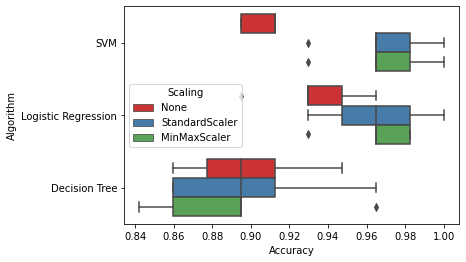

<AxesSubplot:xlabel='F2-score', ylabel='Algorithm'>

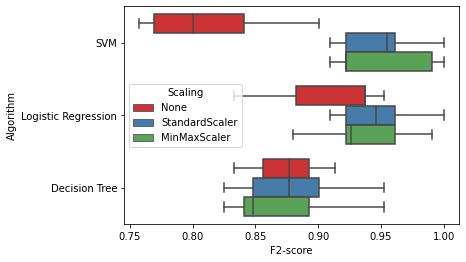

In [471]:
sns.boxplot(y="Algorithm", x="Accuracy",
            hue="Scaling", palette=sns_palette,
            data=res_cv)
plt.show()
sns.boxplot(y="Algorithm", x="F2-score",
            hue="Scaling", palette=sns_palette,
            data=res_cv)

In [472]:
res_joint =  pd.concat([res_ho, res_cv])

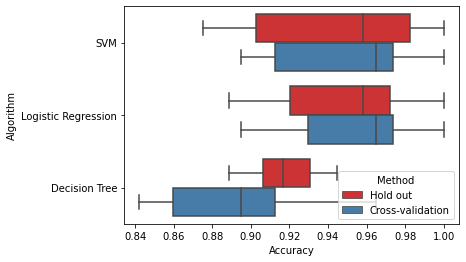

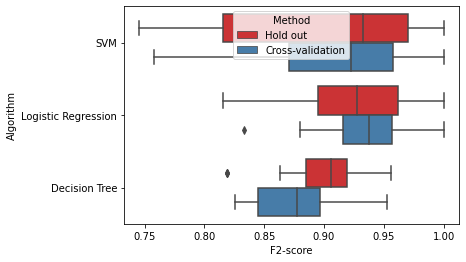

In [473]:
sns.boxplot(y="Algorithm", x="Accuracy",
            hue="Method", palette=sns_palette,
            data=res_joint)
plt.show()
sns.boxplot(y="Algorithm", x="F2-score",
            hue="Method", palette=sns_palette,
            data=res_joint)
plt.savefig('breast-cancer-method.png')

## Hyperparameter tuning

In [474]:
preproc = lambda x: x.split("__",1)[1]

def plot_grid_search(scores, hyperparameters, scale=None):
    data = pd.DataFrame(hyperparameters)
    
    # fix feature names
    if scale is not None:
        data.columns = [preproc(col) for col in data.columns.values] 
        
    data['mean_test_score'] = scores
    
    # fix categorical values
    categorical = data.select_dtypes(exclude='number').columns.values
    for c in categorical:
        oe = OrdinalEncoder()
        data[[c]] = oe.fit_transform(data[[c]])

    fig = px.parallel_coordinates(data, color=data.columns.values[-1], color_continuous_scale=px.colors.sequential.Viridis
                                 )
    fig.show()

def grid_search(model, X, y, hyperparams, scoring, plot=True, metric=None, scale=None):
    if scale is not None:
        model = make_pipeline(scale, model)
    else:
        hyperparams = {preproc(k): v for k, v in hyperparams.items()}
    search = GridSearchCV(model, param_grid=hyperparams)
    search.fit(X,y)
    scores = search.cv_results_['mean_test_score']
    hyperparameters = search.cv_results_['params']
    if plot:
        plot_grid_search(scores, hyperparameters, scale)
    return search.best_params_

In [475]:
params_svm = {
    'svc__kernel': ['linear', 'poly', 'rbf'],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10],
    }

params_lr = {
    'logisticregression__penalty': ['none','l1', 'l2', 'elasticnet'],
    'logisticregression__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
    'logisticregression__solver': ['saga', 'sag', 'lbfgs']
    }

params_dt = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 5, 10, 15],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    'decisiontreeclassifier__max_features': ['sqrt', 'log2'],
    'decisiontreeclassifier__ccp_alpha': [0.1, 0.01, 0.001, 0.0001, 0],
    }

In [476]:
f2 = make_scorer(fbeta_score, beta=2)

In [477]:
best_svm = grid_search(SVC(), X, y, hyperparams = params_svm, scoring=f2, scale=MinMaxScaler())
best_svm

{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'poly'}

In [478]:
best_lr = grid_search(LogisticRegression(), X, y, hyperparams = params_lr, scoring=f2, scale=StandardScaler())
best_lr

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anacond

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anacond

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anacond

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anacond

{'logisticregression__C': 1e-05,
 'logisticregression__penalty': 'none',
 'logisticregression__solver': 'saga'}

In [479]:
best_dt = grid_search(DecisionTreeClassifier(), X, y, hyperparams = params_dt, scoring=f2, scale=MinMaxScaler())
best_dt

{'decisiontreeclassifier__ccp_alpha': 0.01,
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__max_features': 'log2',
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 10}

## Best models comparison

In [480]:
res_best = pd.DataFrame(columns=['Split/Fold', 'Method', 'Algorithm', 'Scaling', 'Accuracy', 'Recall', 'F1-score', 'F2-score', 'Training time'])

In [481]:
best_svm = {preproc(k): v for k, v in best_svm.items()}
best_lr = {preproc(k): v for k, v in best_lr.items()}
best_dt = {preproc(k): v for k, v in best_dt.items()}

In [482]:
res_best = pd.concat([res_best, cross_validation("SVM", SVC(**best_svm), X, y, scale=MinMaxScaler())])
res_best = pd.concat([res_best, cross_validation("Logistic Regression", LogisticRegression(**best_lr), X, y, scale=StandardScaler())])
res_best = pd.concat([res_best, cross_validation("Decision Tree", DecisionTreeClassifier(**best_dt), X, y, scale=MinMaxScaler())])
res_best

,Split/Fold,Method,Algorithm,Scaling,Accuracy,Recall,F1-score,F2-score,Training time
0,1,Cross-validation,SVM,MinMaxScaler,1.000000,1.000000,1.000000,1.000000,0.004008
1,2,Cross-validation,SVM,MinMaxScaler,0.964912,0.904762,0.950000,0.922330,0.004008
2,3,Cross-validation,SVM,MinMaxScaler,1.000000,1.000000,1.000000,1.000000,0.004002
3,4,Cross-validation,SVM,MinMaxScaler,0.947368,0.954545,0.933333,0.945946,0.003999
4,5,Cross-validation,SVM,MinMaxScaler,0.964912,0.909091,0.952381,0.925926,0.003999
0,1,Cross-validation,Logistic Regression,StandardScaler,0.982456,0.952381,0.975610,0.961538,0.022005
1,2,Cross-validation,Logistic Regression,StandardScaler,0.964912,0.904762,0.950000,0.922330,0.021984
2,3,Cross-validation,Logistic Regression,StandardScaler,1.000000,1.000000,1.000000,1.000000,0.021993
3,4,Cross-validation,Logistic Regression,StandardScaler,0.947368,0.954545,0.933333,0.945946,0.018983
4,5,Cross-validation,Logistic Regression,StandardScaler,0.947368,0.954545,0.933333,0.945946,0.018985


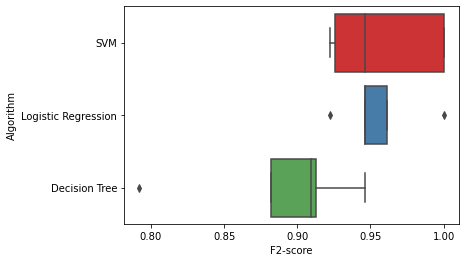

<AxesSubplot:xlabel='Training time', ylabel='Algorithm'>

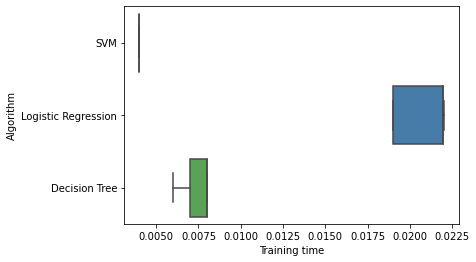

In [483]:
sns.boxplot(y="Algorithm", x="F2-score", palette=sns_palette,
            data=res_best)
plt.show()
sns.boxplot(y="Algorithm", x="Training time", palette=sns_palette,
            data=res_best)

In [484]:
res_best.groupby(['Algorithm']).agg({'F2-score': [ 'min', 'mean', 'max', 'std']})

F2-score                              
                          min      mean       max       std
Algorithm                                                  
Decision Tree        0.792079  0.888502  0.945946  0.058440
Logistic Regression  0.922330  0.955152  1.000000  0.028718
SVM                  0.922330  0.958840  1.000000  0.038636